In [1]:
import pickle
import numpy as np

In [2]:
with open('./vit_base.pkl', 'rb') as f:
    vit_representations = pickle.load(f)

with open('./vgg16.pkl', 'rb') as f:
    vgg_representations = pickle.load(f)
    

In [3]:
vgg_layerwise_avg = np.mean(vgg_representations, axis=0)
vit_layerwise_avg = np.mean(vit_representations, axis=0)

vgg_layerwise_sem = np.std(vgg_representations, axis=0) / np.sqrt(len(vgg_representations))
vit_layerwise_sem = np.std(vit_representations, axis=0) / np.sqrt(len(vit_representations))

In [4]:
reference_ti=(4.89-2.92)/(4.89+2.92); # Table-2, Bartlet and Searcy, 1993  
reference_name ='Bartlet and Searcy, 1993';


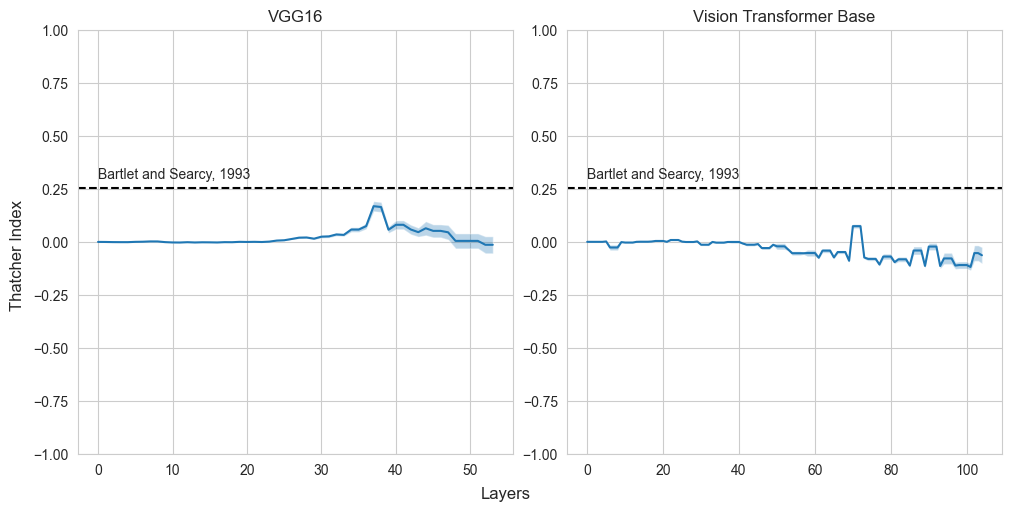

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# plot layerwise average


fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(10, 5))


ax1_layer_inds = np.arange(len(vgg_layerwise_avg))
sns.lineplot(x=ax1_layer_inds, y=vgg_layerwise_avg, ax=ax1, errorbar="se")
ax1.axhline(y=reference_ti, color='black', linestyle='--')
ax1.text(0, reference_ti+0.1, reference_name, verticalalignment='top', horizontalalignment='left')
ax1.set_ylim(-1,1)
ax1.set_title('VGG16')
ax1.fill_between(ax1_layer_inds, vgg_layerwise_avg - vgg_layerwise_sem, vgg_layerwise_avg + vgg_layerwise_sem, alpha=0.3)

ax2_layer_inds = np.arange(len(vit_layerwise_avg))
sns.lineplot(x=ax2_layer_inds, y=vit_layerwise_avg, ax=ax2)
ax2.axhline(y=reference_ti, color='black', linestyle='--')
ax2.text(0, reference_ti+0.1, reference_name, verticalalignment='top', horizontalalignment='left')
ax2.set_title('Vision Transformer Base')
ax2.fill_between(ax2_layer_inds, vit_layerwise_avg - vit_layerwise_sem, vit_layerwise_avg + vit_layerwise_sem, alpha=0.3)

ax2.set_ylim(-1,1)

fig.supxlabel('Layers')
fig.supylabel("Thatcher Index")

plt.show()